In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.5
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)

In [3]:
n_bins = 200

In [4]:
def read_profile(profile_path):
    data = pd.read_csv(profile_path,
                       sep='\t',
                       comment='@',
                       header=None,
                       index_col=None).iloc[:, 6:].copy()
    data.columns = range(int(n_bins * 10))
    plain_table = data.unstack().reset_index()

    samples = [
        "E14_5_FB_H3K27ac", "E11_5_FB_H3K27ac", "E15_5_FB_H3K27ac",
        "AD_P21_FB_H3K27ac", "E16_5_FB_H3K27ac", "E12_5_FB_H3K27ac",
        "E13_5_FB_H3K27ac", "AD_P56_FB_H3K27ac", "AD_P7_FB_H3K27ac",
        "P0_FB_H3K27ac"
    ]

    plain_table['x'] = plain_table['level_0'] % n_bins
    plain_table['y'] = plain_table[0]
    plain_table['sample'] = [
        samples[i] for i in (plain_table['level_0'] // n_bins)
    ]
    plain_table = plain_table[['x', 'y', 'sample']].copy()
    return plain_table

In [5]:
fedmr = read_profile(profile_path='eDMR_with_feDMR.profile.gz')
fedmr_shuffle = read_profile(profile_path='eDMR_with_feDMR.shuffle.profile.gz')

aedmr = read_profile(profile_path='eDMR_without_feDMR.profile.gz')
aedmr_shuffle = read_profile(profile_path='eDMR_without_feDMR.shuffle.profile.gz')

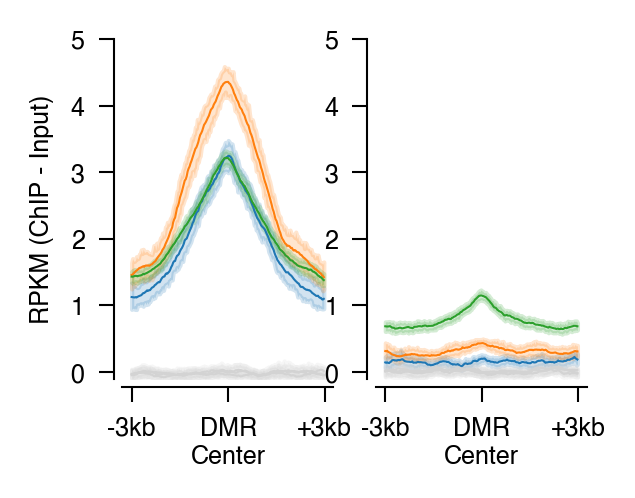

In [32]:
ci = 95
plot_sample = ['E11_5_FB_H3K27ac', 'P0_FB_H3K27ac', 'AD_P56_FB_H3K27ac']

fig, (ax1, ax2) = plt.subplots(figsize=(2, 1.5), dpi=300, ncols=2)

ax = ax1
sns.lineplot(ax=ax,
                  x='x',
                  y='y',
                  hue='sample',
                  hue_order=plot_sample,
                  data=fedmr[fedmr['sample'].isin(plot_sample)],
                  ci=ci, n_boot=100, legend=None)

sns.lineplot(
    ax=ax,
    x='x',
    y='y',
    hue='sample',
    palette={s:'#D3D3D3' for s in plot_sample},
    data=fedmr_shuffle[fedmr_shuffle['sample'].isin(plot_sample)],
    ci=ci, n_boot=100, legend=None)

ax.set(xticks=[0, 100, 200], xticklabels=['-3kb', 'DMR\nCenter', '+3kb'],
       xlabel='', ylabel='RPKM (ChIP - Input)', ylim=(-0.1, 5))
sns.despine(ax=ax, offset=2)


ax = ax2
sns.lineplot(ax=ax,
                  x='x',
                  y='y',
                  hue='sample',
                  hue_order=plot_sample,
                  data=aedmr[aedmr['sample'].isin(plot_sample)],
                  ci=ci, n_boot=100, legend=None)

sns.lineplot(
    ax=ax,
    x='x',
    y='y',
    hue='sample',
    palette={s:'#D3D3D3' for s in plot_sample},
    data=aedmr_shuffle[aedmr_shuffle['sample'].isin(plot_sample)],
    ci=ci, n_boot=100, legend=None)

ax.set(xticks=[0, 100, 200], xticklabels=['-3kb', 'DMR\nCenter', '+3kb'],
       xlabel='', ylabel='', ylim=(-0.1, 5))
sns.despine(ax=ax, offset=2)

fig.savefig('DMR_H3K27ac.line.pdf', bbox_inches='tight')

In [10]:
data = pd.read_csv('eDMR_with_feDMR.profile.gz',
                   sep='\t',
                   comment='@',
                   header=None,
                   index_col=None).iloc[:, 6:].copy()
data.columns = range(2000)
plain_table = data.unstack().reset_index()


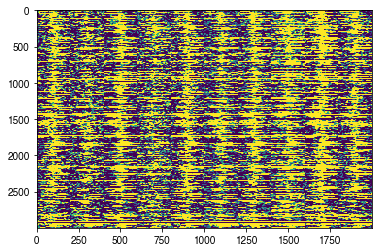

In [11]:
plt.imshow(data, aspect='auto', vmin=0, vmax=2)

In [14]:
plain_table['level_0'].unique()

array([   0,    1,    2, ..., 9997, 9998, 9999])